In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
#load data
winedata = '/content/winequality-red.csv'
df = pd.read_csv(winedata)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()
#Very lucky to have an already cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df['quality'].min()


3

In [ ]:
df['quality'].max()


8

EDA Time


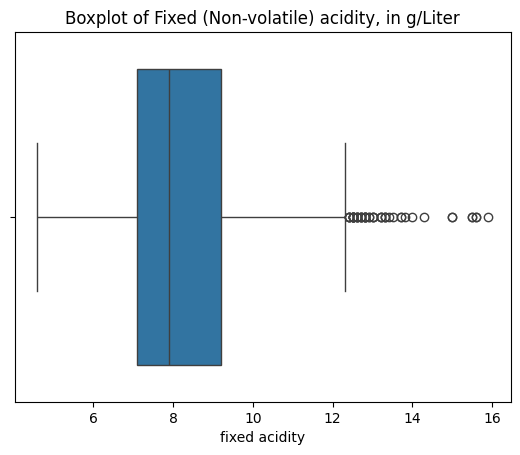

In [ ]:
sns.boxplot(data= df, x='fixed acidity');
plt.title('Boxplot of Fixed (Non-volatile) acidity, in g/Liter');

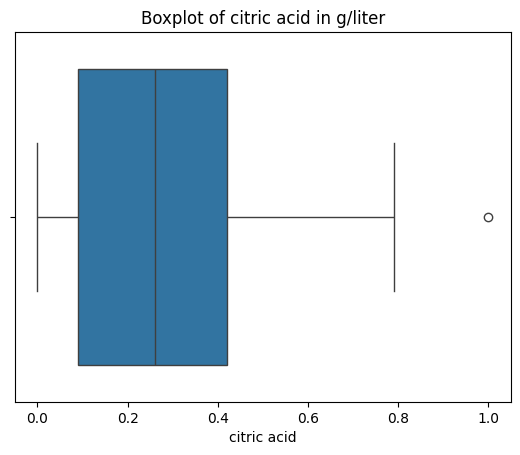

In [ ]:
sns.boxplot(data=df, x='citric acid');
plt.title('Boxplot of citric acid in g/liter');

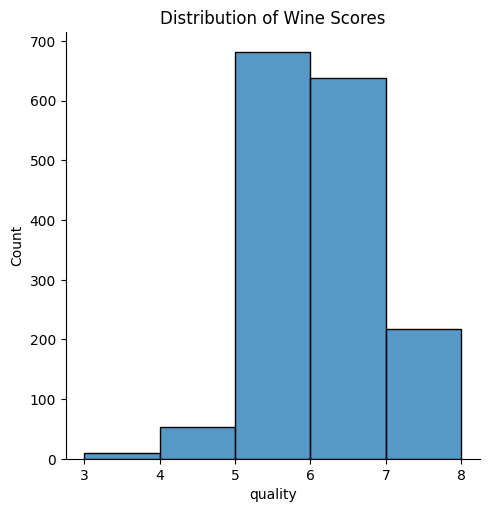

In [ ]:
sns.displot(data=df,x='quality',binwidth=1);
plt.title('Distribution of Wine Scores');

<Axes: xlabel='pH', ylabel='alcohol'>

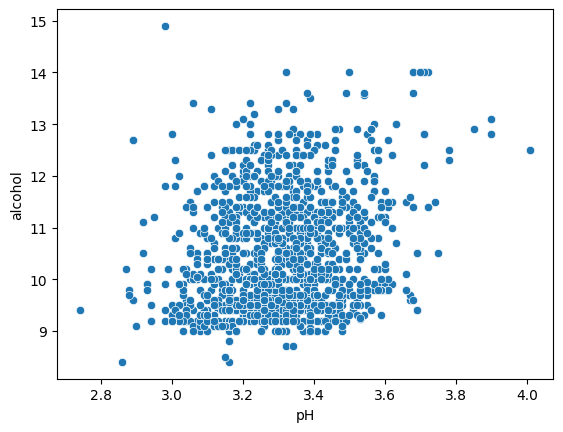

In [ ]:
sns.scatterplot(data=df,x='pH',y='alcohol')

<Axes: xlabel='density', ylabel='alcohol'>

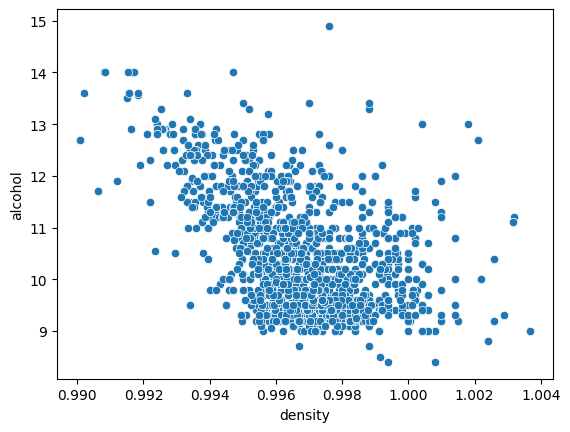

In [ ]:
sns.scatterplot(data=df,x='density',y='alcohol')

<Axes: xlabel='fixed acidity', ylabel='chlorides'>

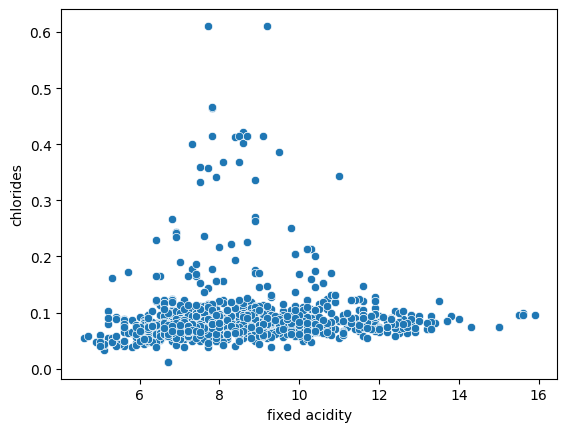

In [ ]:
sns.scatterplot(data=df,x='fixed acidity',y='chlorides')

Regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
#Baseline time
y = df['quality']
baseline_preds = np.ones(len(y))*y.mean()
mse_baseline = mean_squared_error(y, baseline_preds)
mse_baseline

0.6517605398308277

In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#I like the number 101
#We also don't need to build a pipeline to encode anything as thankfully our values are already floats

In [ ]:
#Fit the linear regression model
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Intercept
print("Intercept:", lrmodel.intercept_)

#coefficients
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lrmodel.coef_})
print(coeff_df)


Intercept: 5.6376633958175155
                 Feature  Coefficient
0          fixed acidity     0.029076
1       volatile acidity    -1.183180
2            citric acid    -0.276012
3         residual sugar     0.012420
4              chlorides    -1.816606
5    free sulfur dioxide     0.002518
6   total sulfur dioxide    -0.002902
7                density    -1.662153
8                     pH    -0.424996
9              sulphates     0.874594
10               alcohol     0.305383


In [ ]:
# Predictions
y_train_pred = lrmodel.predict(X_train)
y_test_pred = lrmodel.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test)
print("Baseline MSE:", mse_baseline)

Train MSE: 0.3911585968079635
Test MSE: 0.5261410255981681
Baseline MSE: 0.6517605398308277


In [ ]:
#Let's look at the feature importance (how signficant one feature is)
r = permutation_importance(lrmodel, X_test, y_test, n_repeats=10)
pd.DataFrame(r['importances_mean'],index = X_train.columns.tolist())

,0
fixed acidity,-0.008698
volatile acidity,0.095391
citric acid,0.019528
residual sugar,-0.001796
chlorides,0.018337
free sulfur dioxide,0.006889
total sulfur dioxide,0.017637
density,0.000949
pH,0.004619
sulphates,0.045056


KNN Model now

In [ ]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())])

In [ ]:
param_grid = {
    'knn__n_neighbors': list(range(1, 21))}

In [ ]:
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='neg_mean_squared_error')

In [ ]:
best_knn = grid_search.best_estimator_
print("Best k:", grid_search.best_params_)

Best k: {'knn__n_neighbors': 20}


In [ ]:
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("KNN Test MSE:", mse)
y_pred = best_knn.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("KNN Train MSE:", mse)



KNN Test MSE: 0.5253749999999999
KNN Train MSE: 0.37781274433150897


Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=101)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}

In [ ]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Test MSE:", mse)

Random Forest Test MSE: 0.42490249999999996


In [ ]:
train_pred = best_rf.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
print("Random Forest Train MSE:", train_mse)

Random Forest Train MSE: 0.042659675527756055


In [ ]:
r = permutation_importance(best_rf, X_test, y_test, n_repeats=10)
pd.DataFrame(r['importances_mean'],index = X_train.columns.tolist())

,0
fixed acidity,0.005524
volatile acidity,0.077405
citric acid,0.014976
residual sugar,0.006216
chlorides,0.018824
free sulfur dioxide,0.014523
total sulfur dioxide,0.043048
density,0.004560
pH,0.017353
sulphates,0.170480


Neural Net TIME!!!!!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Scaling data as neural nets are sensitive to it

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
X_train_tensor.shape

torch.Size([1279, 11])

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
nnmodel = nn.Sequential(nn.Linear(X_train_tensor.shape[1],32), nn.ReLU(),
                        nn.Linear(32,16), nn.ReLU(),
                        nn.Linear(16,1))

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(nnmodel.parameters(),lr=0.001,momentum=0.9)

In [ ]:
train_losses = []
test_losses = []
best_test_loss = float('inf')
best_model_state = None


for epoch in range(300):
    nnmodel.train()
    y_pred = nnmodel(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    nnmodel.eval()
    with torch.no_grad():
        test_pred = nnmodel(X_test_tensor)
        test_loss = loss_fn(test_pred, y_test_tensor).item()

    # Save best model
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_model_state = nnmodel.state_dict()

    # Track losses
    train_losses.append(loss.item())
    test_losses.append(test_loss)

    # Optional print
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Test MSE: {test_loss:.4f}")

Epoch 0, Train Loss: 31.0233, Test MSE: 30.2454
Epoch 10, Train Loss: 23.9136, Test MSE: 22.2424
Epoch 20, Train Loss: 9.8149, Test MSE: 7.7400
Epoch 30, Train Loss: 1.9049, Test MSE: 2.5814
Epoch 40, Train Loss: 1.2707, Test MSE: 1.2293
Epoch 50, Train Loss: 1.0428, Test MSE: 1.0075
Epoch 60, Train Loss: 0.6751, Test MSE: 0.7725
Epoch 70, Train Loss: 0.6598, Test MSE: 0.8371
Epoch 80, Train Loss: 0.5879, Test MSE: 0.7228
Epoch 90, Train Loss: 0.5716, Test MSE: 0.7018
Epoch 100, Train Loss: 0.5504, Test MSE: 0.7013
Epoch 110, Train Loss: 0.5367, Test MSE: 0.6864
Epoch 120, Train Loss: 0.5244, Test MSE: 0.6695
Epoch 130, Train Loss: 0.5138, Test MSE: 0.6618
Epoch 140, Train Loss: 0.5043, Test MSE: 0.6551
Epoch 150, Train Loss: 0.4956, Test MSE: 0.6465
Epoch 160, Train Loss: 0.4876, Test MSE: 0.6391
Epoch 170, Train Loss: 0.4804, Test MSE: 0.6332
Epoch 180, Train Loss: 0.4737, Test MSE: 0.6274
Epoch 190, Train Loss: 0.4676, Test MSE: 0.6219
Epoch 200, Train Loss: 0.4618, Test MSE: 0.6169

In [ ]:
nnmodel.eval()
with torch.no_grad():
    final_test_pred = nnmodel(X_test_tensor)
    final_test_mse = loss_fn(final_test_pred, y_test_tensor).item()
    print(f"Best Test MSE: {final_test_mse:.4f}")

Best Test MSE: 0.5813


In [ ]:
nnmodel.eval()
with torch.no_grad():
    final_train_pred = nnmodel(X_train_tensor)
    final_train_mse = loss_fn(final_train_pred, y_train_tensor).item()
    print(f"Best Train MSE: {final_train_mse:.4f}")

Best Train MSE: 0.4223


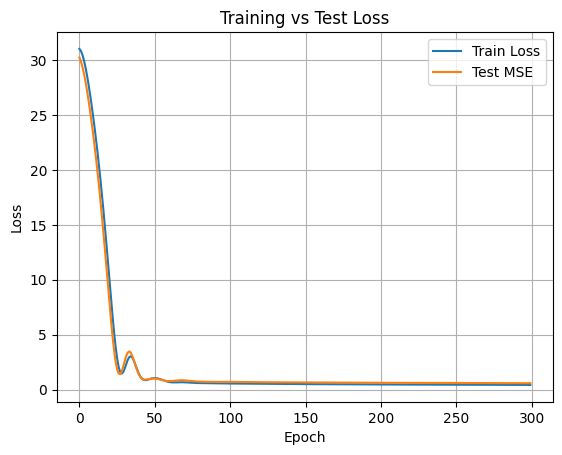

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(train_losses))

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()
